In [1]:
import numpy as np
from matplotlib import pyplot as plt

import h5py

In [6]:
path = "Dataset_ewap_hotel.hdf5"

with h5py.File(path,"r") as f:
    s = ""
    for grp in f:
        s += grp+ ","
    print("Groups:",s[:-1])
    c = 0
    for traj in f["1/"]:
        c += 1
    print(c,"Trajectories in Group 1")
    c = 0
    for traj in f["2/"]:
        c += 1
    print(c,"Trajectories in Group 2")
    c = 0
    for traj in f["3/"]:
        c += 1
    print(c,"Trajectories in Group 3")

Groups:  1,2,3,Images,Unassigned
126 Trajectories in Group 1
65 Trajectories in Group 2
96 Trajectories in Group 3


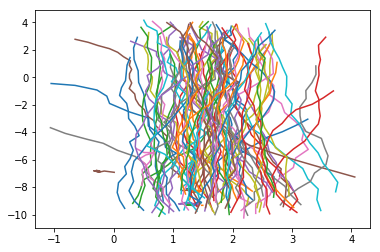

In [25]:
goal = "1/"
goal_minlen = 10

data = []
with h5py.File(path,"r") as f:
    for traj in f[goal]:
        raw = f[goal+traj+"/Positions"][:]
        if len(raw) > goal_minlen:
            data.append(raw)
        
for traj in data:
        plt.plot(traj[:,0],traj[:,1])
plt.show()

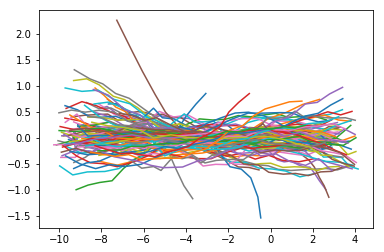

In [26]:
for traj in data:
    mx = np.mean(traj[:,0])
    plt.plot(traj[:,1], traj[:,0]-mx)
plt.show()